<a class="anchor" id="0"></a>
# **Selección de características**

La **selección de características** es el proceso de seleccionar la cantidad óptima de variables de un conjunto más amplio de características. 

Este proceso de selección de características tiene varias ventajas.

Asimismo,  hay varias técnicas disponibles para este proceso. 

<a class="anchor" id="0.1"></a>
# **Tabla de contenido**

1. [Introducción a la selección de características](#1)
2. [Métodos de filtrado](#2)
- 2.1. [Métodos básicos](#2.1)
- 2.1.1 [Eliminar características constantes](#2.1.1)
- 2.1.2 [Eliminar características cuasi constantes](#2.1.2)
- 2.2 [Métodos de selección univariada](#2.2)
- 2.2.1 [SelectKBest](#2.2.1)
- 2.2.2 [SelectPercentile](#2.2.2)
- 2.3 [Ganancia de información](#2.3)
- 2.4 [Puntuación de Fisher (implementación de chi-cuadrado)](#2.4)
- 2.5 [Valor F de ANOVA para selección de características](#2.5)
- 2.6 [Matriz de correlación con mapa de calor](#2.6)
3. [Métodos de envoltura](#3)
- 3.1 [Adelante Selección](#3.1)
- 3.2 [Eliminación hacia atrás](#3.2)
- 3.3 [Selección exhaustiva de características](#3.3)
- 3.4 [Eliminación recursiva de características](#3.4)
- 3.5 [Eliminación recursiva de características con validación cruzada](#3.5)
4. [Métodos integrados](#4)
- 4.1 [Regresión LASSO](#4.1)
- 4.2 [Importancia del bosque aleatorio](#4.2)
5. [Cómo elegir el método de selección de características adecuado](#5)
6. [Consejos y trucos para la selección de características](#6)
7. [Referencias](#7)

# **1. Introducción a la selección de características** <a class="anchor" id="1"></a>

[Tabla de contenido](#0.1)

## **Selección de características**

- La **selección de características** o **selección de variables** es el proceso de seleccionar un subconjunto de características o variables relevantes de las características totales de un nivel en un conjunto de datos para crear algoritmos de aprendizaje automático.

## **Ventajas de la selección de características**

- El proceso de selección de características tiene varias ventajas:

1. Mayor precisión
2. Los modelos simples son más fáciles de interpretar.
3. Tiempos de entrenamiento más cortos
4. Mayor generalización al reducir el sobreajuste
5. Más fácil de implementar por parte de los desarrolladores de software
6. Menor riesgo de errores de datos por el uso del modelo
7. Redundancia de variables
8. Mal comportamiento de aprendizaje en espacios de alta dimensión

## **Selección de características: técnicas**

- Las técnicas de selección de características se clasifican en 3 tipos:

1. Métodos de filtro
2. Métodos de envoltura
3. Métodos integrados

## **Métodos de filtro**

- Los métodos de filtro consisten en varias técnicas:

1. Métodos básicos
2. Métodos univariados
3. Ganancia de información
4. Puntuación de Fischer
5. Matriz de correlación con mapa de calor

## **Métodos de envoltura**

- Los métodos de envoltura consisten en las siguientes técnicas:

1. Selección hacia adelante
2. Eliminación hacia atrás
3. Selección exhaustiva de características
4. Eliminación recursiva de características
5. Eliminación recursiva de características con validación cruzada

## **Métodos integrados**

- Los métodos integrados consisten en las siguientes técnicas:

1. LASSO
2. RIDGE
3. Importancia del árbol

- Analicemos estos métodos en detalle.

# **2. Métodos de filtrado** <a class="anchor" id="2"></a>

[Tabla de contenidos](#0.1)

Los métodos de filtrado se utilizan generalmente como un paso de preprocesamiento. 

La selección de características es independiente de cualquier algoritmo de ML: las características se seleccionan **en función de sus puntuaciones en varias pruebas estadísticas para su correlación con la variable de resultado**.

Las características de estos métodos son las siguientes:

- Estos métodos se basan en las características de los datos (características de las características)
- No utilizan algoritmos de aprendizaje automático.
- Son independientes del modelo.
- Suelen ser menos costosos computacionalmente.
- Suelen ofrecer un rendimiento de predicción inferior al de los métodos de envoltura.
- Son muy adecuados para una selección rápida y la eliminación de características irrelevantes.

Los métodos de filtrado constan de varias técnicas:
- 2.1. Métodos básicos
- 2.2. Selección de características univariadas
- 2.3. Ganancia de información
- 2.4. Puntuación de Fischer
- 2.5. Valor F de ANOVA para selección de características
- 2.6. Matriz de correlación con mapa de calor

- Los métodos de filtrado se pueden explicar con la ayuda del siguiente gráfico:

![FilterMethods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)

- Fuente de la imagen: AnalyticsVidhya

## **2.1 Métodos básicos** <a class="anchor" id="2.1"></a>

[Tabla de contenido](#0.1)

- En los métodos básicos, eliminamos las características constantes y cuasi-constantes.

## **2.1.1 Eliminar características constantes** <a class="anchor" id="2.1.1"></a>

[Tabla de contenido](#0.1)

- Las características constantes son aquellas que muestran el mismo valor, solo un valor, para todas las observaciones del conjunto de datos. Es decir, el mismo valor para todas las filas del conjunto de datos. Estas características no brindan información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo.

- Identificar y eliminar características constantes es un primer paso sencillo hacia la selección de características y modelos de aprendizaje automático más fáciles de interpretar. 

- Para identificar características constantes, podemos usar la función **VarianceThreshold** de sklearn.

- Demostraremos cómo identificar características constantes utilizando el conjunto de datos de satisfacción del cliente de Santander.

- Referencias:

    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

    - https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importamos el conjunto de datos de satisfacción del cliente de Santander desde Kaggle

X_train = pd.read_csv('../data/santander/train.csv', nrows=35000)

X_test = pd.read_csv('../data/santander/test.csv', nrows=15000)

In [ ]:
# eliminar la etiqueta TARGET de X_train
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [ ]:
# comprobar la forma de los conjuntos de entrenamiento y prueba

X_train.shape, X_test.shape

### **Importante**

- En todos los procedimientos de selección de características, es recomendable seleccionar las características **examinando únicamente el conjunto de entrenamiento**. Esto se hace para evitar el sobreajuste.

### **Uso del umbral de varianza de sklearn**

- El umbral de varianza de sklearn es un enfoque de referencia simple para la selección de características. 
- Elimina todas las características cuya varianza no cumple con un umbral. 
- De manera predeterminada, elimina todas las características de varianza cero, es decir, características que tienen el mismo valor en todas las muestras.

In [ ]:
# usando variancethreshold para encontrar características constantes

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit encuentra las características con varianza cero

In [ ]:
# get_support es un vector booleano que indica qué características se conservan
# si sumamos get_support, obtenemos la cantidad de características que no son constantes
sum(sel.get_support())

In [ ]:
# forma alternativa de encontrar características no constantes
len(X_train.columns[sel.get_support()])

In [ ]:
# imprimimos las características constantes
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

- Podemos observar que hay 51 columnas/variables que son constantes: Esto significa que 51 variables muestran el mismo valor, un solo valor, para todas las observaciones del conjunto de entrenamiento.

- Usaremos la función de transformación para reducir los conjuntos de entrenamiento y prueba.

In [ ]:
# Podemos eliminar estas columnas de los conjuntos de prueba y entrenamiento.
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
# comprobar la forma del conjunto de entrenamiento y prueba

X_train.shape, X_test.shape

-Podemos ver cómo al eliminar características constantes, logramos reducir bastante el espacio de características.

## **2.1.2 Eliminar características cuasiconstantes** <a class="anchor" id="2.1.2"></a>

[Tabla de Contenidos](#0.1)

- Las características cuasiconstantes son aquellas que **muestran el mismo valor para la gran mayoría de las observaciones** del conjunto de datos. 
    - En general, estas características proporcionan poca o ninguna información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo. 
    - Pero puede haber excepciones. 
    - Por lo tanto, debemos tener cuidado al eliminar este tipo de características. 
- Identificar y eliminar características cuasiconstantes es un primer paso sencillo hacia la selección de características y modelos de aprendizaje automático más fácilmente interpretables.

- Para identificar características cuasiconstantes, podemos volver a utilizar la función **VarianceThreshold** de sklearn.

In [ ]:
# Importamos nuevamente el conjunto de datos de satisfacción del cliente de Santander desde Kaggle

X_train = pd.read_csv('../data/santander/train.csv', nrows=35000)

X_test = pd.read_csv('../data/santander/test.csv', nrows=15000)

In [ ]:
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [ ]:
X_train.shape, X_test.shape

### **Eliminación de características cuasi constantes**

#### **Uso del umbral de varianza de sklearn**

- Aquí, cambiaremos el umbral predeterminado para eliminar las características casi/cuasi constantes.

In [ ]:
sel = VarianceThreshold(threshold=0.01)  # 0,1 indica aproximadamente el 99 % de las observaciones

sel.fit(X_train)  # fit encuentra las características con baja varianza

In [ ]:
sum(sel.get_support())

In [ ]:
len(X_train.columns[sel.get_support()])

In [ ]:
# Finalmente podemos imprimir las características cuasi-constantes
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

- Podemos ver que 107 columnas/variables son casi constantes. Esto significa que 107 variables muestran predominantemente un valor para aproximadamente el 99 % de las observaciones del conjunto de entrenamiento.

In [ ]:
# porcentaje de observaciones que muestran cada uno de los diferentes valores
X_train['ind_var31'].value_counts() / (len(X_train))

- Podemos ver que > 99% de las observaciones muestran un valor, 0. Por lo tanto, esta característica es casi constante.

In [ ]:
# Luego podemos eliminar las características del conjunto de entrenamiento y prueba.
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
# comprobar la forma del conjunto de entrenamiento y prueba
X_train.shape, X_test.shape

- Al eliminar características constantes y cuasiconstantes, redujimos el espacio de características de 370 a 263. Se eliminaron más de 100 características del conjunto de datos actual.

## **2.2 Métodos de selección univariada** <a class="anchor" id="2.2"></a>

[Tabla de Contenidos](#0.1)

- Los métodos de selección de características univariadas funcionan seleccionando las mejores características en función de pruebas estadísticas univariadas como **ANOVA**. 
    - Puede considerarse como un paso de preprocesamiento de un estimador. 
    - Scikit-learn expone rutinas de selección de características como **objetos que implementan el método de transform**.

- **Los métodos basados ​​en f-test estiman el grado de dependencia lineal entre dos variables aleatorias**. 
    - Suponen una relación lineal entre la característica y el objetivo. Estos métodos también suponen que las variables siguen una distribución gaussiana.

- Hay 4 métodos que entran en esta categoría:

1. SelectKBest
2. SelectPercentile
3. SelectFpr, SelectFdr o SelectFwe de error por familia
4. GenericUnivariateSelection

Referencias: 
    - https://scikit-learn.org/stable/modules/feature_selection.html

- Aquí, limitaremms la discusión a SelectKBest y SelectPercentile, porque estos dos son los más utilizados en la práctica.

## **2.2.1 SelectKBest** <a class="anchor" id="2.2.1"></a>

[Tabla de contenido](#0.1)

- Este método selecciona características según los **k puntajes más altos**.

    - Por ejemplo, podemos realizar una prueba de chi-cuadrado a las muestras para recuperar solo las dos mejores características del conjunto de datos de iris de la siguiente manera:

Referencias: 

- https://scikit-learn.org/stable/modules/feature_selection.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

In [ ]:
# seleccionamos las dos mejores características
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

- Hemos seleccionado las dos mejores características del conjunto de datos del iris.

## **2.2.2 SelectPercentile** <a class="anchor" id="2.2.2"></a>

[Tabla de contenido](#0.1)

- Seleccione las características según un percentil de las puntuaciones más altas.

Referencias: 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape


In [ ]:
# Ahora seleccione funciones basadas en el percentil 10 superior
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

- Podemos ver que solo 7 características se encuentran en el percentil 10 superior y, por lo tanto, las seleccionamos en consecuencia.

## **Información importante**

- Estos objetos toman como entrada una función de puntuación que devuelve puntuaciones univariadas y valores p (o solo puntuaciones para [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) y [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile):

    - Para tareas de regresión: [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)

    - Para tareas de clasificación: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2),
    [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

- Los métodos basados ​​en el f-test estiman el grado de dependencia lineal entre dos variables aleatorias. 

- por otro lado, los métodos de información mutua pueden capturar cualquier tipo de dependencia estadística, pero al ser no paramétricos, requieren más muestras para una estimación precisa.

## **Selección de características con datos dispersos**

- Si se tienen
 datos dispersos (es decir, datos representados como matrices dispersas), [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) se ocupará de los datos sin hacerlos densos.

Referencias: 
- https://scikit-learn.org/stable/modules/feature_selection.html

## **Advertencia**

- Tener cuidado de no utilizar una función de puntuación de regresión con un problema de clasificación, ya que se obtendrá resultados inútiles.

## **2.3 Ganancia de información** <a class="anchor" id="2.3"></a>

[Tabla de contenido](#0.1)

- La **ganancia de información** o **información mutua** mide **cuánta información aporta la presencia/ausencia de una característica** a la hora de hacer una predicción correcta sobre el objetivo.

- Según [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

> La información mutua mide la información que comparten X e Y: mide en qué medida el conocimiento de una de estas variables reduce la incertidumbre sobre la otra. 
> - Por ejemplo, si X e Y son independientes, entonces conocer X no proporciona ninguna información sobre Y y viceversa, por lo que su información mutua es cero. 
> - En el otro extremo, si X es una función determinista de Y e Y es una función determinista de X, entonces toda la información transmitida por X se comparte con Y: conocer X determina el valor de Y y viceversa. 
> - Como resultado, en este caso la información mutua es la misma que la incertidumbre contenida en Y (o X) por sí sola, es decir, la entropía de Y (o X). 
> - Además, esta información mutua es la misma que la entropía de X y que la entropía de Y. (Un caso muy especial de esto es cuando X e Y son la misma variable aleatoria.)

## **mutual_info_classif**

- Estima la información mutua para una **variable objetivo discreta**.

- La información mutua (IM) entre dos variables aleatorias es un valor no negativo que mide la dependencia entre las variables. 
    - Es igual a *cero* si y solo si dos variables aleatorias son *independientes*, 
    - Valores más altos significan una mayor dependencia.

- Esta función se basa en métodos no paramétricos basados ​​en la estimación de la entropía a partir de las distancias de los k vecinos más cercanos.

- Se puede utilizar para la selección de características univariadas.

Referencias:
-  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

## **mutual_info_regression**

- Estimación de la información mutua para una variable objetivo continua.

- La información mutua (IM) entre dos variables aleatorias es un valor no negativo que mide la dependencia entre las variables. 
    - Es igual a cero si y solo si dos variables aleatorias son independientes, 
    - y los valores más altos significan una mayor dependencia.

- La función se basa en métodos no paramétricos basados ​​en la estimación de la entropía a partir de las distancias de los k vecinos más cercanos.

- Se puede utilizar para la selección de características univariadas

Referencias:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

## **2.4 Puntuación de Fisher (implementación de chi-cuadrado)** <a class="anchor" id="2.4"></a>

[Tabla de contenido](#0.1)

- Es la **implementación de chi-cuadrado** en scikit-learn. 
- Calcula estadísticas de chi-cuadrado entre cada característica y clase no negativa.

- Esta puntuación se debe utilizar para evaluar *variables categóricas* en una tarea de clasificación. 
- Compara la distribución observada de las diferentes clases de Y objetivo entre las diferentes categorías de la característica, contra la distribución esperada de las clases objetivo, independientemente de las categorías de la característica.

In [ ]:
# cargamos librerías
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Cargamos datos del iris
iris = load_iris()

# creamos características y objetivos
X = iris.data
y = iris.target

# convertimos a datos categóricos mediante la conversión de datos a números enteros
X = X.astype(int)

In [ ]:
# Comparamos estadísticas de chi-cuadrado
# Seleccionamos dos características con las estadísticas de chi-cuadrado más altas
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [ ]:
# caracterísricas
chi2_selector.get_feature_names_out()

In [ ]:
# Resultados
print('Número original de características:', X.shape[1])
print('Número reducido de características:', X_kbest.shape[1])

- Podemos ver que el código anterior nos ayuda a seleccionar las 2 mejores características según la puntuación de Fisher.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_selector = SelectKBest(mutual_info_classif, k=2)
X_kbest = mutual_selector.fit_transform(X, y)

In [ ]:
# caracterísricas
mutual_selector.get_feature_names_out()

In [ ]:
# Resultados
print('Número original de características:', X.shape[1])
print('Número reducido de características:', X_kbest.shape[1])

## **2.5 Valor F de ANOVA para la selección de características** <a class="anchor" id="2.5"></a>

[Tabla de contenido](#0.1)

- Calcula el valor F de ANOVA para la muestra proporcionada.
    - https://scikit-learn.org/1.3/modules/generated/sklearn.feature_selection.f_classif.html

    - Si las características son **categóricas**, calcularemos una estadística de **chi-cuadrado** entre cada característica y el vector objetivo. 

    - Si las características son **cuantitativas**, calcularemos el valor **F de ANOVA** entre cada característica y el vector objetivo.

- Los puntajes del valor F examinan si, cuando agrupamos la característica numérica por el vector objetivo, las medias para cada grupo son significativamente diferentes.

In [ ]:
# cargamos librerías
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# Datos iris
iris = load_iris()

# Creamos características y objetivos
X = iris.data
y = iris.target

In [ ]:
# Seleccionar características con los mejores valores F de ANOVA

# Creamos un objeto SelectKBest para seleccionar características con los dos mejores valores F de ANOVA
fvalue_selector = SelectKBest(f_classif, k=2)

# Aplicamos el objeto SelectKBest a las características y al objetivo
X_kbest = fvalue_selector.fit_transform(X, y)

In [ ]:
# Resultados
print('Número original de características:', X.shape[1])
print('Número reducido de características:', X_kbest.shape[1])

- Podemos ver que el código anterior nos ayuda a seleccionar las 2 mejores características según el valor F de ANOVA.

## **2.6 Matriz de correlación con mapa de calor** <a class="anchor" id="2.6"></a>

[Tabla de contenido](#0.1)

- La **correlación** es una medida de la relación lineal de 2 o más variables. A través de la correlación, podemos predecir una variable a partir de la otra.

> **Las buenas variables están altamente correlacionadas con el objetivo**.

- Las variables predictoras correlacionadas proporcionan información redundante.

> **Las variables deben estar correlacionadas con el objetivo pero no correlacionadas entre sí**.

- La selección de características de correlación evalúa subconjuntos de características sobre la base de la siguiente hipótesis:

    - *"Los buenos subconjuntos de características contienen características altamente correlacionadas con el objetivo, pero no correlacionadas entre sí".*

<br>

- Podemos encontrar características que están correlacionadas entre sí. 
    - Al identificar estas características, podemos decidir cuáles queremos conservar y cuáles queremos eliminar.

- Usando la correlación de **Pearson**, los valores de los coeficientes variarán entre -1 y 1.

    - Si la correlación entre dos características es **0**, esto significa que **cambiar cualquiera de estas dos características no afectará a la otra**.

    - Si la correlación entre dos características es **mayor que 0**, esto significa que aumentar los valores de una característica hará que aumenten también los valores de la otra característica (cuanto más cercano esté el coeficiente de correlación a 1, más fuerte será el vínculo entre las dos características diferentes).

    - Si la correlación entre dos características es **menor que 0**, esto significa que aumentar los valores de una característica hará que disminuyan los valores de la otra característica (cuanto más cercano esté el coeficiente de correlación a -1, más fuerte será la relación entre las dos características diferentes).

- En este análisis, comprobaremos si las variables seleccionadas están altamente correlacionadas entre sí. Si lo están, entonces necesitaremos mantener solo una de las correlacionadas y descartar las demás.

In [ ]:
# Datos iris
from sklearn.datasets import load_iris
iris = load_iris()

# Crear características y objetivos
X = iris.data
y = iris.target

In [ ]:
# Convertir la matriz de características en un Dataframe
df = pd.DataFrame(X)

print(df)

In [ ]:
# Creamos matriz de correlación
corr_matrix = df.corr()
print(corr_matrix)

In [ ]:
# Creamos mapa de calor de correlación
plt.figure(figsize=(8,6))
plt.title('Mapa de calor de correlación del dataset Iris')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    


In [ ]:
 # Seleccionamos el triángulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper    

In [ ]:
# Encontrar el índice de columnas de características con correlación mayor a 0,9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

In [ ]:
# Drop características marcadas
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)


- Podemos ver que hemos eliminado la tercera columna del conjunto de datos original.

# **3. Métodos de envoltura (Wrapper)** <a class="anchor" id="3"></a>

[Tabla de contenido](#0.1)

- En los métodos de envoltura, intentamos **usar un subconjunto de características y entrenar un modelo con ellas**. 
    - En función de las inferencias que extraemos del modelo anterior, decidimos agregar o eliminar características del subconjunto. 
    - El problema se reduce esencialmente a un problema de búsqueda. 
    - Estos métodos suelen ser muy costosos desde el punto de vista computacional.

- Algunos métodos de envoltura son

    1. Selección hacia adelante (Forward Selection),
    2. Eliminación hacia atrás (Backward elimination),
    3. Selección exhaustiva de características,
    4. Eliminación recursiva de características.
    5. Eliminación recursiva de características con validación cruzada

- Los métodos de envoltura se pueden explicar con la ayuda del siguiente gráfico:

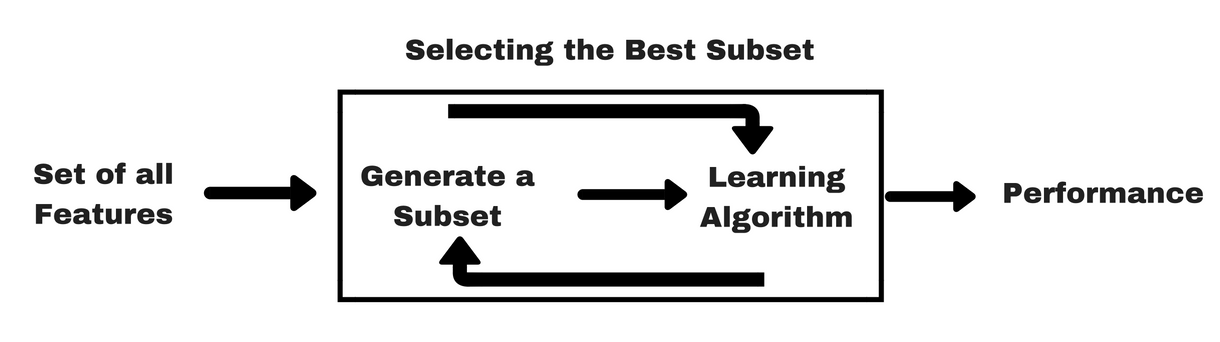



- Fuente imagen : AnalyticsVidhya

## **3.1 Selección hacia adelante** <a class="anchor" id="3.1"></a>

[Tabla de contenido](#0.1)

- La selección hacia adelante (Forward selection) es un método iterativo en el que **comenzamos sin tener ninguna característica** en el modelo. 
    - En cada iteración, seguimos **agregando la característica que mejore nuestro modelo** hasta que la adición de una nueva variable no mejore el rendimiento del modelo.

    - El procedimiento comienza con un conjunto vacío de características [conjunto reducido]. 
    - Se determina la mejor de las características originales y se agrega al conjunto reducido. 
    - En cada iteración posterior, se agrega al conjunto el mejor de los atributos originales restantes.

- Los criterios preestablecidos pueden ser, por ejemplo, `roc_auc` para la clasificación y `r2_score` para la regresión.

- Este procedimiento de selección **es voraz**, porque evalúa todas las posibles combinaciones de características simples, dobles, triples, etc. 
    - Por lo tanto, es bastante costoso computacionalmente y, a veces, si el espacio de características es grande, incluso inviable.

<br>

- Hay un paquete especial para Python que implementa este tipo de selección de características: *mlxtend*.
    - https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector
    - En la implementación mlxtend de la selección de características por pasos hacia adelante, el criterio de detención es un número de características establecido arbitrariamente. Por lo tanto, la búsqueda finalizará cuando alcancemos el número deseado de características seleccionadas.

- Asimismo, la clase Sequential Feature Selector añade (forward selection) o elimina (backward selection) características para formar un subconjunto de características.
    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

- Demostraremos el algoritmo de selección de características hacia adelante de mlxtend utilizando el conjunto de datos de precios de la vivienda.

In [ ]:
# !pip install mlxtend

In [ ]:
# seleccción step forward

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#load dataset
data = pd.read_csv('../data/house-prices/train.csv')
data.shape

In [ ]:
# En la práctica, la selección de características debe realizarse después del preprocesamiento de los datos,
# por lo que, idealmente, todas las variables categóricas se codifican en números,
# y luego se puede evaluar cuán deterministas son respecto del objetivo

# Aquí, para simplificar, utilizaremos solo variables numéricas

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# Conjuntos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# buscar y eliminar características correlacionadas
def correlation(dataset, threshold):
    col_corr = set()  # Conjunto de todos los nombres de columnas correlacionadas
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Nos interesa el valor del coeficiente absoluto
                colname = corr_matrix.columns[i]  # Obtener el nombre de la columna
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('características correlacionadas: ', len(set(corr_features)) )

In [ ]:
# características correlacionadas eliminadas
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

In [ ]:
X_train.fillna(0, inplace=True)

In [ ]:
# Selección hacia adelante

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

In [ ]:
sfs1.k_feature_idx_

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

- Podemos ver que la selección de características hacia adelante da como resultado que las columnas anteriores se seleccionen de todas las columnas dadas.

## **3.2 Eliminación hacia atrás** <A class = "Anchor" id = "3.2"> </a>

[Tabla de contenido](#0.1)


- En la eliminación hacia atrás (Backward Elimination), **comenzamos con todas las características y elimina la característica menos significativa** en cada iteración, lo que mejora el rendimiento del modelo.
- Repetimos esto hasta que no se observa una mejora en la eliminación de las características.

In [ ]:
# Eliminación de características hacia atrás
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

In [ ]:
sfs1.k_feature_idx_

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

- La eliminación hacia atrás da como resultado las siguientes columnas que se seleccionan.

## **3.3 Selección de características exhaustivas** <A class = "Anchor" id = "3.3"> </a>

[Tabla de contenido](#0.1)


- En una selección de características exhaustivas, **se selecciona el mejor subconjunto de características**, en todos los subconjuntos de características posibles, al optimizar una métrica de rendimiento especificada para un determinado algoritmo de aprendizaje automático.Por ejemplo, si el clasificador es una regresión logística y el conjunto de datos consta de 4 características, el algoritmo evaluará las 15 combinaciones de características de la siguiente manera:

  - Todas las combinaciones posibles de 1 característica
  - Todas las combinaciones posibles de 2 características
  - Todas las combinaciones posibles de 3 características
  - Todas las 4 características


y se selecciona el que resulte en el mejor rendimiento (por ejemplo, precisión de clasificación) del clasificador de regresión logística.

- Este es otro algoritmo codicioso (consume recursos), ya que evalúa todas las combinaciones de características posibles.Es bastante costoso computacionalmente y, a veces, si el espacio de características es grande, incluso nocivo.

- Hay un paquete especial para Python que implementa este tipo de selección de características: **MLXTEND**.

- En la implementación de MLXTEND de la selección de características exhaustivas, los criterios de detención son un número de características establecido arbitrariamente.Por lo tanto, la búsqueda finalizará cuando alcancemos el número deseado de características seleccionadas.

- Esto es algo arbitrario porque podemos estar seleccionando un número subopimal de características, o de la misma manera, una gran cantidad de características.

## **3.4 Eliminación de características recursivas** <A class = "Anchor" id = "3.4"> </a>

[Tabla de contenido](#0.1)


- Es un algoritmo de optimización codicioso que tiene como objetivo encontrar el subconjunto de características de mejor rendimiento.Repetidamente crea modelos y mantiene a un lado la mejor o la característica de peor desempeño en cada iteración.Construye el siguiente modelo con las características izquierdas hasta que todas las características están agotadas.Luego clasifica las características basadas en el orden de su eliminación.

- La eliminación de características recursivas realiza una búsqueda codiciosa para encontrar el subconjunto de características de mejor rendimiento.Crea modelos iterativamente y determina la mejor o la característica de peor desempeño en cada iteración.Construye los modelos posteriores con las características izquierdas hasta que se exploran todas las características.Luego clasifica las características basadas en el orden de su eliminación.En el peor de los casos, si un conjunto de datos contiene un número de características que RFE hará una búsqueda codiciosa de 2n combinaciones de características.

Referencias: 
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-lectection-plot-rfe-digits-py

## **3.5 Eliminación de características recursivas con validación cruzada** <A class = "Anchor" id = "3.5"> </a>

[Tabla de contenido](#0.1)


- **La eliminación de características recursivas con la técnica de selección de características validada (RFECV)** selecciona el mejor subconjunto de características para el estimador eliminando 0 a N características iterativamente utilizando la eliminación de características recursivas.

- Luego selecciona el mejor subconjunto en función de la precisión o puntaje de validación cruzada o ROC-AUC del modelo.La técnica de eliminación de características recursivas elimina las características de N de un modelo ajustando el modelo varias veces y en cada paso, eliminando las características más débiles.

Referencias: 
- https://scikit-learn.org/stable/auto_examples/feature_selection/Plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feato-selection-plot-with-with-cross-validation-py

# **4.Métodos integrados** <A class = "Anchor" id = "4"> </a>

[Tabla de contenido](#0.1)


- Los métodos integrados **son iterativos** en un sentido que se encarga de **cada iteración** del proceso de entrenamiento del modelo y **extrae cuidadosamente las características que más contribuyen** al entrenamiento para una iteración particular.
- Los **métodos de regularización** son los métodos integrados más utilizados que penalizan una característica dado un umbral de coeficiente.

- Esta es la razón por la cual los métodos de regularización también se denominan **métodos de penalización** que introducen restricciones adicionales en la optimización de un algoritmo predictivo (como un algoritmo de regresión) que sesga el modelo hacia una complejidad más baja (menos coeficientes).

- Algunos de los ejemplos más populares de estos métodos son la regresión de Lasso y Ridge que tienen funciones de penalización incorporadas para reducir el sobreajuste.


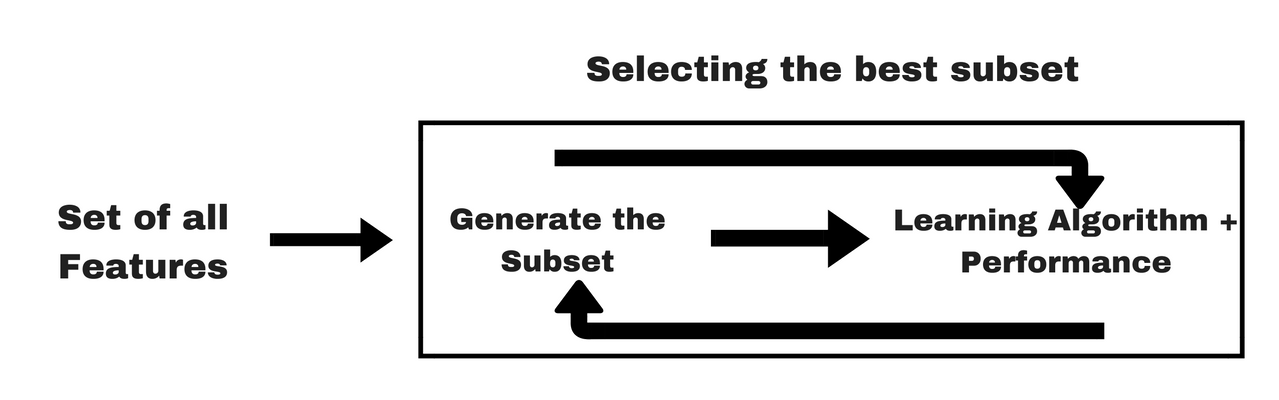
- fuente : AnalyticsVidhya

## **4.1 Regresión Lasso** <A class = "Anchor" id = "4.1"> </a>

[Tabla de contenido](#0.1)


- La regresión de Lasso realiza la **regularización de tipo L1**, lo que agrega una penalización equivalente al valor absoluto de la magnitud de los coeficientes.

    - La regularización consiste en agregar una **penalización a los diferentes parámetros del modelo** de aprendizaje automático para reducir la libertad del modelo y, en otras palabras, para evitar el sobreajuste.
    - En la regularización del modelo lineal, la penalización se aplica sobre los coeficientes que multiplican cada uno de los predictores.
    - De los diferentes tipos de regularización, Lasso o L1 tiene la propiedad que puede reducir algunos de los coeficientes a cero.
    - Por lo tanto, esa característica se puede eliminar del modelo.

- Demostraremos cómo seleccionar funciones utilizando la regularización de lasso en el conjunto de datos de precios de la vivienda.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# carga dataset
data = pd.read_csv('../data/house-prices/train.csv')
data.shape

In [ ]:
# En la práctica, la selección de características debe realizarse después del preprocesamiento de datos,
# Idealmente, todas las variables categóricas están codificadas en números,
# y luego se puede evaluar cuán deterministas son del objetivo

# Aquí, por simplicidad, usaré solo variables numéricas
# Seleccionar columnas numéricas:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# Las características del conjunto de datos de la casa tienen
# escala muy diferentes, por lo hay que escalarlas

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

In [ ]:
# Aquí, nuevamente entrenaremos una regresión lineal de Lasso y seleccionaremos las características no cero en una línea.
# Tener en cuenta que el objeto de regresión lineal de Sklearn no permite la regularización.
# Si se desea hacer una regresión lineal regularizada, debe importarse específicamente "Lasso", 
# esa es la versión L1 del alfa de regresión lineal es la penalización, 
# por lo que la configuraremos alta para obligar al algoritmo a reducir algunos coeficientes

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

In [ ]:
sel_.get_support()

In [ ]:
# hace una lista con las características seleccionadas e imprima las salidas
selected_feat = X_train.columns[(sel_.get_support())]

print('Características totales: {}'.format((X_train.shape[1])))
print('Características seleccionadas: {}'.format(len(selected_feat)))
print('Características con coeficientes que se reducen a cero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

- Podemos ver que la regularización de Lasso ayuda a eliminar características no importantes del conjunto de datos.Por lo tanto, aumentar la penalización dará como resultado un aumento del número de características eliminadas.
    - Por lo tanto, debemos vigilar y monitorear que no establecemos una penalización demasiado alta para eliminar incluso las características importantes, o demasiado bajas y luego no eliminar las características no importantes.

- Si la penalización es demasiado alta y se eliminan las características importantes, notaremos una caída en el rendimiento del algoritmo y luego nos damos cuenta de que necesitamos disminuir la regularización.

## **4.2 Importancia del Random Forest** <A class = "Anchor" id = "4.2"> </a>

[Tabla de contenido](#0.1)

- Los Random Forest son uno de los algoritmos de aprendizaje automático más popular.
    - Tienen mucho éxito porque proporcionan en general un buen rendimiento predictivo, bajo sobreajuste y fácil interpretabilidad.
    - Esta interpretabilidad es dada por el hecho de que es sencillo derivar la importancia de cada variable en la decisión del árbol.
    - En otras palabras, es fácil calcular cuánto está contribuyendo cada variable a la decisión.

- Los Random Forest consisten en 4-12 cientos de árboles de decisión, cada uno de ellos construido a lo largo de una extracción aleatoria de las observaciones del conjunto de datos y una extracción aleatoria de las características.
    - No todos los árboles ven todas las características o todas las observaciones, y esto garantiza que los árboles estén descorracados y, por lo tanto, menos propensos a ajustar.Cada árbol también es una secuencia de preguntas sí-no basadas en un solo o combinación de características.En cada nodo (esto es en cada pregunta), los tres dividen el conjunto de datos en 2 cubos, cada uno de ellos alojando observaciones que son más similares entre ellos y diferentes de los que están en el otro cubo.Por lo tanto, la importancia de cada característica se deriva de cuán "puro" es cada uno de los cubos.

- Para la clasificación, la medida de la impureza es la impureza de Gini o la ganancia de información/entropía.Para la regresión, la medida de la impureza es la varianza.Por lo tanto, al entrenar un árbol, es posible calcular cuánto disminuye cada característica la impureza.Cuanto más disminuye una característica, más importante es la característica.
    - En los Random Forest, la disminución de la impureza de cada característica se puede promediar en los árboles para determinar la importancia final de la variable.

- Para dar una mejor intuición, las características seleccionadas en la parte superior de los árboles son en general más importantes que las características seleccionadas en los nodos finales de los árboles, ya que generalmente las divisiones superiores conducen a mayores ganancias de información.

- Demostraremos este proceso utilizando el conjunto de datos de clasificación de hongos:

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# cargamos dataset
df = pd.read_csv('../data/mushrooms.csv')

In [ ]:
# Declaramos vector de características y variable target
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
# Codificamos variables categóricas
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

In [ ]:
# Normalizamos el vector de características
X2 = StandardScaler().fit_transform(X)

In [ ]:
# Dividimos el datset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [ ]:

# instanciamos el clasificador con n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
# Ajustamos el clasificador al set de entrenamiento
clf.fit(X_train, y_train)

In [ ]:
# Predecimos en el conjunto de pruebas
y_pred = clf.predict(X_test)

## **Importancia de la característica**

- Se pueden usar modelos de árboles de decisión que se basan en conjuntos (por ejemplo, árboles adicionales y bosques aleatorios) para clasificar la importancia de las diferentes características.
- Saber a qué características nuestro modelo está dando la mayor importancia, puede ser de vital importancia para comprender cómo nuestro modelo está haciendo sus predicciones (por lo tanto, lo hace más explicable).
- Al mismo tiempo, podemos deshacernos de las características que no aportan ningún beneficio a nuestro modelo.

In [ ]:
# Visualizamos la importancia de la característica

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

- Ahora que sabemos qué características son más importantes en el modelo, podemos entrenar nuestro modelo solo utilizando estas características.

# **5.Cómo elegir el método de selección de características correctas** <A class = "Anchor" id = "5"> </a>

[Tabla de contenido](#0.1)


- Podemos ver que hay muchas técnicas de selección de características disponibles.

- El siguiente gráfico servirá como guía sobre cómo elegir un método de selección de características:-

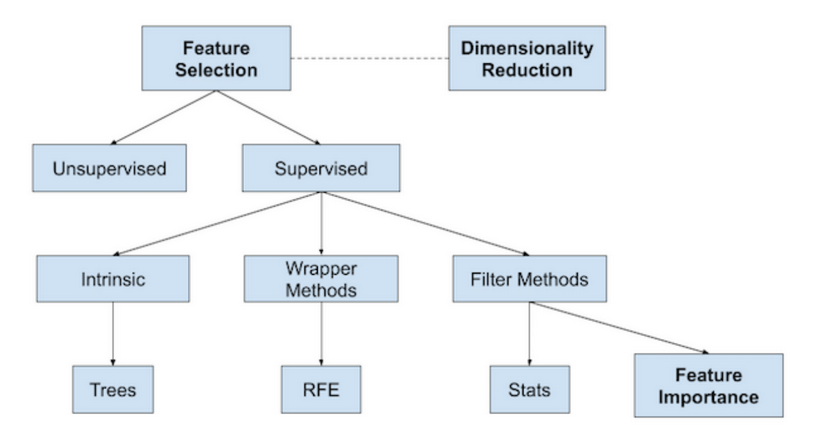


- fuente: Machine Learning Mastery

## **Entrada numérica, salida numérica**

- Este es un problema de modelado predictivo de regresión con variables de entrada numérica.

- Las técnicas más comunes son utilizar un **coeficiente de correlación**, como la de Pearson para una correlación lineal o métodos basados ​​en rango para una correlación no lineal.

- Las pruebas empleadas son:
    - Coeficiente de correlación de Pearson (lineal).
    - Coeficiente de rango de Spearman (no lineal)


## **Entrada numérica, salida categórica**

- Este es un problema de modelado predictivo de clasificación con variables de entrada numérica.

- Este podría ser el ejemplo más común de un problema de clasificación,

- Una vez más, las técnicas más comunes se basan en la **correlación**, aunque en este caso, deben tener en cuenta el **objetivo categórico**.

- Podemos emplear las siguientes pruebas:

    - Coeficiente de correlación ANOVA (lineal).
    - Coeficiente de rango de Kendall (no lineal).

- Kendall supone que la variable categórica es ordinal.


## **Entrada categórica, salida numérica**

- Este es un problema de modelado predictivo de regresión con variables de entrada categóricas.

- Este es un ejemplo extraño de un problema de regresión (no lo encontraremos a menudo).

- Podemos usar los **mismos métodos de "entrada numérica, salida categórica"** ​​(descritos anteriormente), pero **al revés**.




## **Entrada categórica, salida categórica**

- Este es un problema de modelado predictivo de clasificación con variables de entrada categóricas.

- La medida de correlación más común para los datos categóricos es la prueba de **chi cuadrado**.También podemos usar información mutua (ganancia de información) del campo de la teoría de la información.

- Las siguientes pruebas se pueden emplear en este caso:

    - Prueba de chi cuadrado (tablas de contingencia).
    - Información mutua.

        - De hecho, la información mutua es un método poderoso que puede resultar útil para datos categóricos y numéricos, p.Es agnóstico para los tipos de datos.

# **6.Consejos y trucos para la selección de características**<A class = "Anchor" id = "6"> </a>

[Tabla de contenido](#0.1)


- Proporcionamos algunas consideraciones adicionales al usar la selección de características basada en filtros.


## **Estadísticas de correlación**

- Scikit-Learn proporciona una implementación de la mayoría de las medidas estadísticas útiles.

- Por ejemplo:

    - Coeficiente de correlación de Pearson: [F_Regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
    - Anova: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
    -chi-squared: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
    - Información mutua: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) y [mutual_info_regression ()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).


- Además, la librería SciPy proporciona una implementación de muchas más estadísticas, como la Tau (Kendalltau) de Kendall (Kendalltau) y la correlación de rango de Spearman (Spearmanr).


## **Método de selección**

- Scikit-Learn también proporciona muchos métodos de filtrado diferentes una vez que se han calculado las estadísticas para cada variable de entrada con el objetivo.

- Dos de los métodos más populares incluyen:

- Seleccione las variables K superiores: [selectkBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.selectkbest.html)
- Seleccione las variables del percentil superior: [SelectPermentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.selectpercentile.html)



## **Variables de transformación**

- Podemos considerar transformar las variables para acceder a diferentes métodos estadísticos.
    - Por ejemplo, podemos transformar una variable categórica en Ordinal, incluso si no es así, y ver si salen resultados interesantes.

    - También podemos hacer una variable numérica discreta (por ejemplo, contenedores); intenta medidas basadas en categóricas.

- Algunas medidas estadísticas asumen propiedades de las variables, como las de Pearson que supone una distribución de probabilidad gaussiana a las observaciones y una relación lineal.Puede transformar los datos para cumplir con las expectativas de la prueba y probar la prueba independientemente de las expectativas y comparar los resultados.


## **¿Cuál es el mejor método?**

- No hay el mejor método de selección de características. Al igual que no hay el mejor conjunto de variables de entrada o el mejor algoritmo de aprendizaje automático.

- En cambio, debemos descubrir qué funciona mejor para su problema específico utilizando una cuidadosa experimentación sistemática.

- Debemos probar una gama de diferentes modelos que se ajustan en diferentes subconjuntos de características elegidas a través de diferentes medidas estadísticas y descubrir lo que funciona mejor para su problema específico.


## **Los 4 ⭐ mejores formas de selección de características**

- Las 4 formas prácticas de selección de características que producen los mejores resultados son los siguientes:-

1. SelectKBest
2. Eliminación de características recursivas
3. Matriz de correlación con mapa de calor
4. Importancia al azar de forestal

# **7.Referencias** <A class = "Anchor" id = "7"> </a>

[Tabla de contenido](#0.1)


1. Selección de características para el aprendizaje automático. *Soledad Galli*

2. [Análisis Vidhya Artículo sobre selección de funciones](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)

3. https://en.wikipedia.org/wiki/feature_selection

4. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

[Ir al inicio](#0)

# **8.Ejercicio** <A class = "Anchor" id = "7"> </a>

[Tabla de contenido](#0.1)


Aplica métodos de filtrado, wrapper e integrados para reducir la dimensionalidad y mejorar el rendimiento del modelo.

- Métodos de filtrado
    - Elimina de características constantes y cuasi constantes.
    - Selecciona variables univariada con SelectKBest y SelectPercentile.
    - Análiza de correlación con mapa de calor.
- Métodos Wrapper
    - Elimina de manrea recursiva características con regresión logística.
- Métodos Integrados
    - Selecciona con LASSO para identificar las características más importantes.